In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel("/content/DS - Assignment Part 1 data set.xlsx")
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [3]:
df.shape

(414, 9)

In [4]:
#Data Preprocessing
#Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them. 
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 3
Float variables: 6


Exploratory Data Analysis


EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all your variables.

So here let’s make a heatmap using seaborn library.

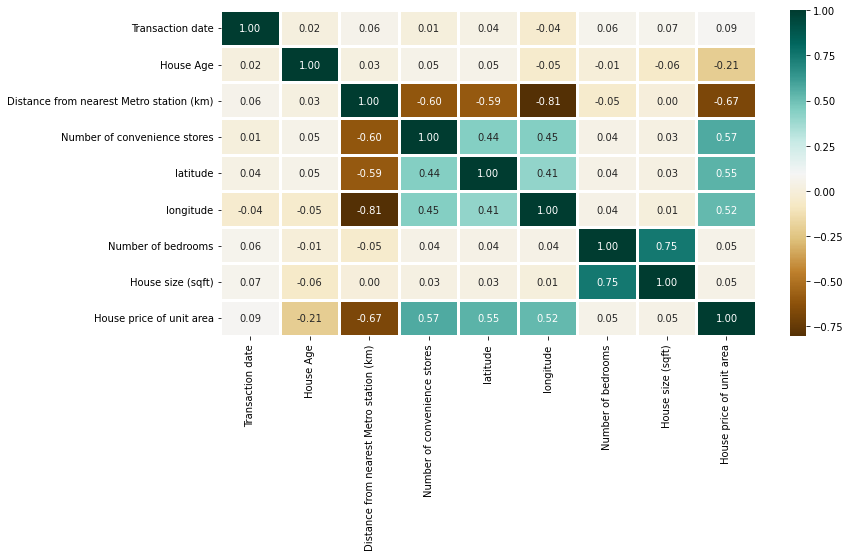

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

Data Cleaning

In [6]:
df['House price of unit area'] = df['House price of unit area'].fillna(df['House price of unit area'].mean())

In [7]:
new_df = df.dropna()

In [8]:
new_df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

Splitting Dataset into Training and Testing

X and Y splitting (i.e. Y is the House price of unit area column and the rest of the other columns are X)



In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df.drop(['House price of unit area'], axis=1)
Y = df['House price of unit area']
 
# Split the training set into
# training and validation set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

Model and Accuracy

As we have to train the model to determine the continuous values, so we will be using these regression models.

SVM-Support Vector Machine

Random Forest Regressor

Linear Regressor

And To calculate loss we will be using the mean_absolute_percentage_error module. It can easily be imported by using sklearn library. The formula for Mean Absolute Error : 

In [10]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_test)
 
print(mean_absolute_percentage_error(Y_test, Y_pred))

0.19952337323280223


In [11]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)
 
mean_absolute_percentage_error(Y_test, Y_pred)

0.14534914665786552

In [12]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)
 
print(mean_absolute_percentage_error(Y_test, Y_pred))

0.17012009837423156


Conclusion 

Clearly, SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models. To get much better results ensemble learning techniques like Bagging and Boosting can also be used.